# Lazy Regression Simple 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
data = pd.read_csv('../Data/moore.csv', header=None).to_numpy()

In [4]:
# data

In [5]:
X = data[:,0].reshape(-1,1) # making an N x D matrix
Y = data[:,1]

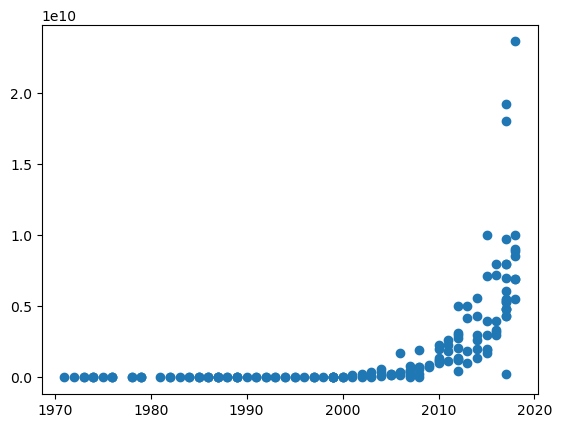

In [6]:
plt.scatter(X, Y);

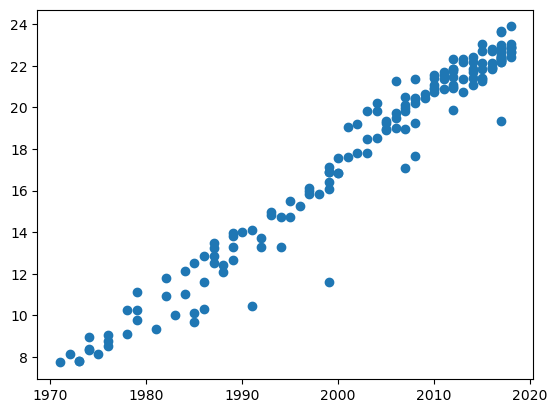

In [7]:
Y = np.log(Y)
plt.scatter(X, Y);

In [8]:
# Reduce the effect of the years
X = X - X.mean()

## Build Model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),   
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [11]:
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [12]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 370.5759 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 330.5356 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 250.9776 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 386.2760 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 264.7092 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 165.4253 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95.3610 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.9146 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 130.6772 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.3274 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.9916 - learning_rate: 0.0010
Epoch 12/200

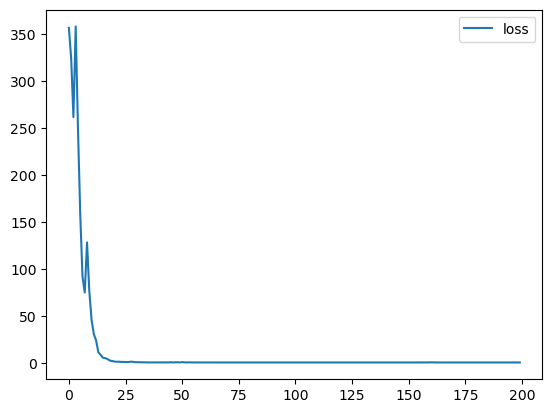

In [13]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [14]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[<Dense name=dense, built=True>]
[array([[0.3369353]], dtype=float32), array([17.7709], dtype=float32)]


In [15]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [31]:
print("Time to double:", np.log(2) / a)

Time to double: 2.05721144916277


In [33]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.34168248738731344 17.764939393631767
Time to double: 2.0286295205239178


## Make Predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


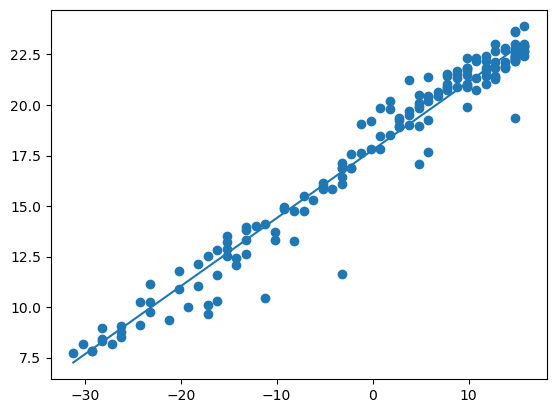

In [35]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat);

In [37]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True